In [230]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import tensorflow.keras as tk
import matplotlib.pyplot as plt
# import shap

In [231]:
# Load the dataset
data = pd.read_csv('data/music_genre.csv', na_values = ['','?','NaN', 'nan'])
print(data.shape)
data.head()

(50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [232]:
data = data.dropna()
print(data.shape)

(45020, 18)


In [233]:
data = data.drop(["instance_id", "artist_name", "track_name", "obtained_date", "mode"], axis = 1)
data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,0.2980,98.028,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,0.0550,122.043,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,0.0441,75.886,0.354,Hip-Hop


In [234]:
data = data.drop(data[data["duration_ms"] < 0].index)
data.reset_index(inplace = True)
data = data.drop(["index"], axis = 1)
data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,0.0300,115.002,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,0.0345,127.994,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,0.2390,128.014,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,0.0413,145.036,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,0.3510,149.995,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,0.0516,99.988,0.629,Hip-Hop
40556,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,0.0550,122.043,0.113,Hip-Hop
40557,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop
40558,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,0.0441,75.886,0.354,Hip-Hop


In [235]:
print(data['music_genre'].unique())
print(data['key'].unique())

['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']
['D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'A#' 'D#']


In [236]:
key_encoder = LabelEncoder()
key_dictionary = dict(zip(key_encoder.fit_transform(data['key']), data['key']))
print(key_dictionary)
data['key'] = key_encoder.fit_transform(data['key'])
data

{5: 'D', 11: 'G#', 4: 'C#', 9: 'F#', 2: 'B', 10: 'G', 8: 'F', 0: 'A', 3: 'C', 7: 'E', 1: 'A#', 6: 'D#'}


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,0.0300,115.002,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0.0345,127.994,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0.2390,128.014,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0.0413,145.036,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,0.3510,149.995,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,56.0,0.13300,0.849,237667.0,0.660,0.000008,3,0.296,-7.195,0.0516,99.988,0.629,Hip-Hop
40556,72.0,0.15700,0.709,251860.0,0.362,0.000000,2,0.109,-9.814,0.0550,122.043,0.113,Hip-Hop
40557,51.0,0.00597,0.693,189483.0,0.763,0.000000,5,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop
40558,65.0,0.08310,0.782,262773.0,0.472,0.000000,10,0.106,-5.016,0.0441,75.886,0.354,Hip-Hop


In [237]:
genre_encoder = LabelEncoder()
genre_dictionary = dict(zip(genre_encoder.fit_transform(data['music_genre']), data['music_genre']))
print(genre_dictionary)
data['music_genre'] = genre_encoder.fit_transform(data['music_genre'])
data

{5: 'Electronic', 1: 'Anime', 7: 'Jazz', 0: 'Alternative', 4: 'Country', 8: 'Rap', 2: 'Blues', 9: 'Rock', 3: 'Classical', 6: 'Hip-Hop'}


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,0.0300,115.002,0.531,5
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0.0345,127.994,0.333,5
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0.2390,128.014,0.270,5
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0.0413,145.036,0.323,5
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,0.3510,149.995,0.230,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,56.0,0.13300,0.849,237667.0,0.660,0.000008,3,0.296,-7.195,0.0516,99.988,0.629,6
40556,72.0,0.15700,0.709,251860.0,0.362,0.000000,2,0.109,-9.814,0.0550,122.043,0.113,6
40557,51.0,0.00597,0.693,189483.0,0.763,0.000000,5,0.143,-5.443,0.1460,131.079,0.395,6
40558,65.0,0.08310,0.782,262773.0,0.472,0.000000,10,0.106,-5.016,0.0441,75.886,0.354,6


In [238]:
data["music_genre"].value_counts()

music_genre
9    4099
6    4077
1    4064
7    4064
0    4051
4    4049
2    4046
8    4042
3    4036
5    4032
Name: count, dtype: int64

In [239]:
# Group the data by genre
grouped = data.groupby("music_genre")

# Initialize variables for the overall training and test data
X_train = []
y_train = []
X_test = []
y_test = []

# Split each genre into training and test data
for genre, group in grouped:
    X_group = group.drop(["music_genre"], axis=1).values
    y_group = group["music_genre"]

    X_group_train, X_group_test, y_group_train, y_group_test = train_test_split(X_group, y_group, shuffle = True, test_size=0.2, random_state=99)

    X_train.extend(X_group_train)
    y_train.extend(y_group_train)
    X_test.extend(X_group_test)
    y_test.extend(y_group_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [240]:
# shuffle the dataset
y_train = y_train.reshape((len(y_train), 1))
xy = np.append(X_train, y_train, axis=1)
np.random.shuffle(xy)
print(xy)
X_train = xy[:,0:12]
y_train = xy[:,12]
print(y_train)

[[6.40000e+01 8.91000e-01 4.31000e-01 ... 1.50105e+02 2.84000e-01
  9.00000e+00]
 [2.00000e+01 1.12000e-02 6.04000e-01 ... 1.31021e+02 7.15000e-01
  1.00000e+00]
 [5.60000e+01 1.17000e-02 6.10000e-01 ... 8.25230e+01 4.42000e-01
  4.00000e+00]
 ...
 [2.50000e+01 2.22000e-02 3.96000e-01 ... 1.10002e+02 1.39000e-01
  1.00000e+00]
 [2.10000e+01 2.45000e-03 4.46000e-01 ... 1.71933e+02 6.82000e-01
  1.00000e+00]
 [6.20000e+01 2.11000e-01 7.51000e-01 ... 9.30200e+01 4.19000e-01
  8.00000e+00]]
[9. 1. 4. ... 1. 1. 8.]


In [241]:
y_test = y_test.reshape((len(y_test), 1))
xy_test = np.append(X_test, y_test, axis=1)
np.random.shuffle(xy_test)
print(xy_test)
X_test = xy_test[:,0:12]
y_test = xy_test[:,12]
print(y_test)

[[5.80000e+01 3.39000e-05 4.38000e-01 ... 1.28040e+02 7.05000e-01
  0.00000e+00]
 [3.80000e+01 4.45000e-03 6.78000e-01 ... 9.82410e+01 4.95000e-01
  7.00000e+00]
 [3.80000e+01 2.81000e-01 6.17000e-01 ... 1.28441e+02 7.73000e-01
  7.00000e+00]
 ...
 [5.80000e+01 8.17000e-04 6.82000e-01 ... 1.12622e+02 4.53000e-01
  0.00000e+00]
 [4.90000e+01 1.07000e-01 6.81000e-01 ... 1.56071e+02 5.66000e-01
  5.00000e+00]
 [3.20000e+01 3.68000e-04 7.43000e-01 ... 1.22012e+02 1.72000e-01
  5.00000e+00]]
[0. 7. 7. ... 0. 5. 5.]


In [242]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(32443, 12)
32443
(8117, 12)
8117


In [243]:
# standard scale training dataset and testing dataset
center = StandardScaler().fit(X_train)
X_train_center = center.transform(X_train)
X_test_center = center.transform(X_test)

In [244]:
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop, Ftrl
from tensorflow.keras.regularizers import l2, l1
import csv

In [299]:
# Dimension of features
n_features = X_train_center.shape[1]

# layer1 = [128, 256, 512]
# layer2 = [128, 256, 512]
# layer3 = [128, 256, 512]
# regularizer = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
# momentum = [0.8, 0.9, 0.99,0.999]
# learningrate = [0.1, 0.01, 0.001]
# epoch = [100, 200, 250, 500, 1000]
# batch_size = [32, 64, 128, 256]
# validation = [0.1, 0.2]
# verbose = [0, 1]
# tk.layers.Dense(name="h2", input_dim=n_features, units=la2, kernel_regularizer=l2(r), bias_regularizer=l2(r), activation='relu'), 
                                        
model = tk.models.Sequential(name="Deep_Neural_Network", layers=[                                    
    # tk.layers.BatchNormalization(momentum = m),
    tk.layers.Dense(name = "h1", input_dim = n_features, units = 32, kernel_regularizer='l2', activation = 'relu'),

    # tk.layers.BatchNormalization(momentum = m),
    # tk.layers.Dropout(name="drop1", rate=0.2),

    tk.layers.Dense(name = "h2", input_dim = n_features, units = 64, kernel_regularizer='l2', activation = 'relu'), 

    # tk.layers.BatchNormalization(momentum = m),
    # tk.layers.Dropout(name="drop2", rate=0.2),

    tk.layers.Dense(name = "h3", input_dim = n_features, units = 128, kernel_regularizer='l2', activation = 'tanh'),

    tk.layers.Dense(name = "h4", input_dim = n_features, units = 256, kernel_regularizer='l2', activation = 'tanh'),

    # tk.layers.Dense(name = "h5", input_dim = n_features, units = 32, kernel_regularizer='l2', activation = 'tanh'),

    # tk.layers.Dense(name = "h6", input_dim = n_features, units = 128, activation = 'relu'),

    # tk.layers.BatchNormalization(momentum = m),
    # tk.layers.Dropout(name="drop3", rate=0.2),

    tk.layers.Dense(name = "output", units = 512, activation= tf.nn.softmax)
])

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adadelta(learning_rate=0.1),metrics=['accuracy'])

history = model.fit(X_train_center, y_train, epochs=300, batch_size=128, validation_data=(X_test_center, y_test))



Epoch 1/300


2023-10-19 21:16:20.674287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


254/254 [==============================] - ETA: 0s - loss: 5.7443 - accuracy: 0.2510

2023-10-19 21:16:28.121951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


254/254 [==============================] - 10s 25ms/step - loss: 5.7443 - accuracy: 0.2510 - val_loss: 4.1412 - val_accuracy: 0.3639
Epoch 2/300
254/254 [==============================] - 2s 9ms/step - loss: 3.5558 - accuracy: 0.4079 - val_loss: 3.0821 - val_accuracy: 0.4382
Epoch 3/300
254/254 [==============================] - 2s 9ms/step - loss: 2.7798 - accuracy: 0.4594 - val_loss: 2.5151 - val_accuracy: 0.4780
Epoch 4/300
254/254 [==============================] - 2s 9ms/step - loss: 2.3574 - accuracy: 0.4790 - val_loss: 2.2071 - val_accuracy: 0.4956
Epoch 5/300
254/254 [==============================] - 2s 9ms/step - loss: 2.1206 - accuracy: 0.4860 - val_loss: 2.0257 - val_accuracy: 0.4985
Epoch 6/300
254/254 [==============================] - 3s 11ms/step - loss: 1.9760 - accuracy: 0.4937 - val_loss: 1.9145 - val_accuracy: 0.5012
Epoch 7/300
254/254 [==============================] - 3s 10ms/step - loss: 1.8811 - accuracy: 0.4966 - val_loss: 1.8354 - val_accuracy: 0.4991
Epoch 8

In [303]:
model.evaluate(X_test_center, y_test)

254/254 [==============================] - 2s 6ms/step - loss: 1.3205 - accuracy: 0.5541


[1.3204784393310547, 0.5541456341743469]

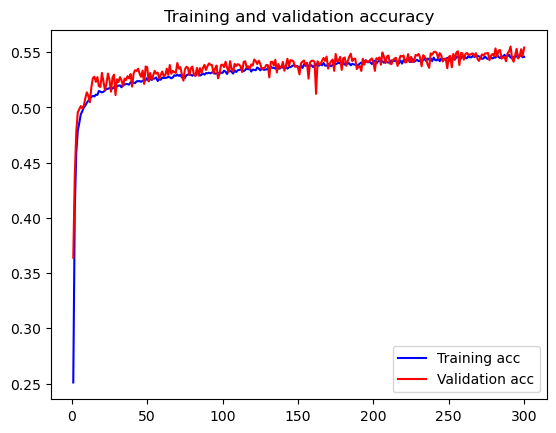

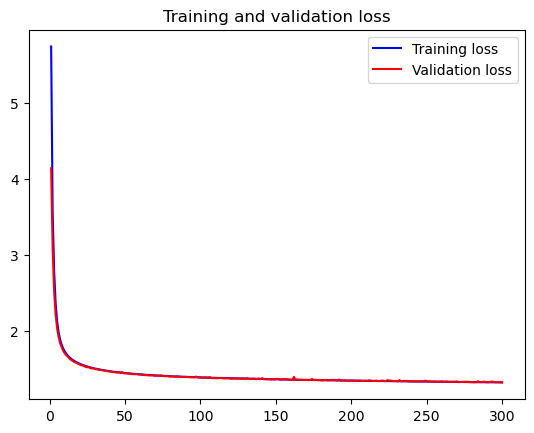

In [304]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()